In [ ]:
%pip install seaborn



In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [20]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('./fcc-forum-pageviews.csv', index_col='date', parse_dates=['date'])
df2_5 = df.value.quantile(0.025)
df97_5 = df['value'].quantile(0.975)

#clean data
df = df[(df.value >= df2_5)&(df.value <= df97_5)]


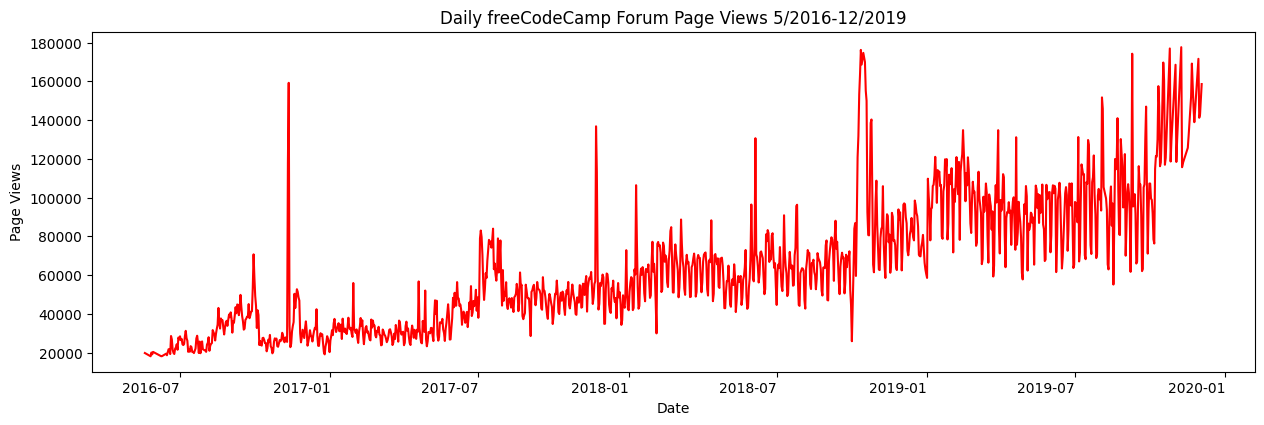

In [41]:
fig = df.plot.line(figsize=(15,5), color='red', legend=False)
plt.xlabel('Date')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xticks(rotation = 0)
plt.ylabel('Page Views')
fig = fig.figure
 # Save image and return fig (don't change this part)
fig.savefig('line_plot.png')


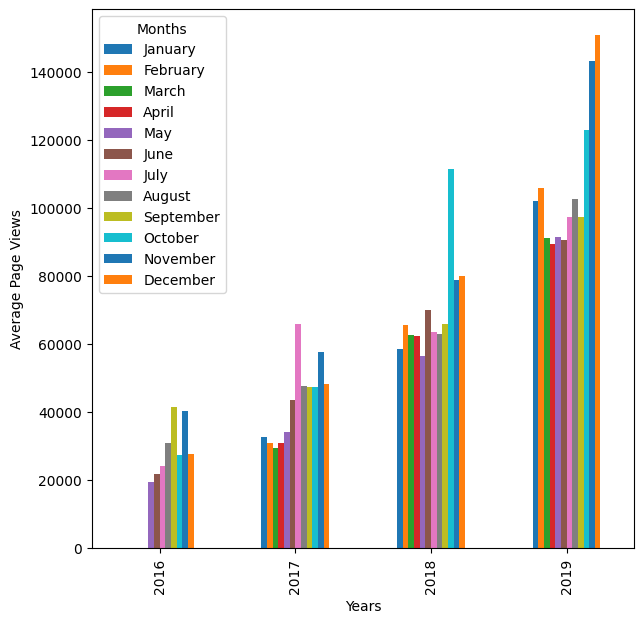

In [47]:
df_bar = df.copy()
df_bar['year'] =  df.index.year
df_bar['month'] = df.index.month_name()
# grouping and orgenizing the df
df_bar_group = df_bar.groupby(['year', 'month'])['value'].mean()
df_bar_group = df_bar_group.unstack(level='month')
df_bar_group = df_bar_group[['January', 'February', 'March', 'April', 'May',
                            'June', 'July', 'August', 'September', 'October', 'November', 'December']]

# Draw bar plot
fig = df_bar_group.plot.bar(figsize=(7,7)).figure
plt.xlabel('Years');
#plt.xticks(rotation = 0)
plt.ylabel('Average Page Views');
plt.legend(title='Months');

# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

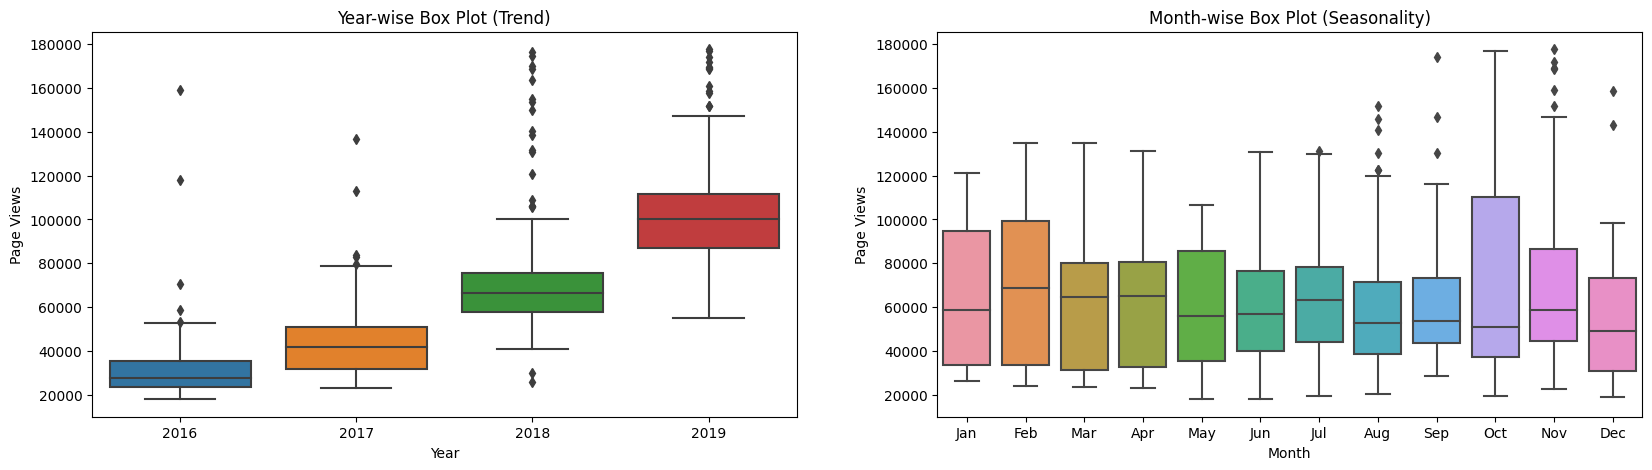

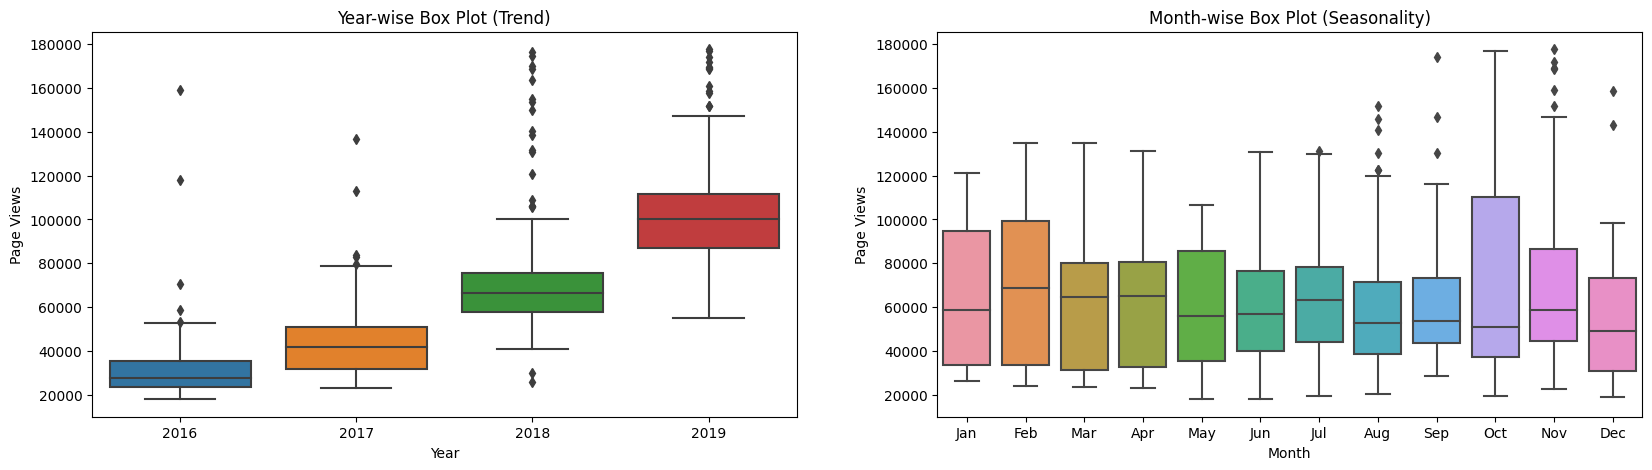

In [48]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    mon_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    ax1 = sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
    ax2 = sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=mon_order);
    ax1.set_ylabel('Page Views')
    ax1.set_xlabel('Year')
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax2.set_ylabel('Page Views')
    ax2.set_xlabel('Month')
    ax2.set_title('Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()

In [65]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = df.index.year
df_box['month'] = [d.strftime('%B') for d in df_box.date]
df_box


,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,November
1234,2019-11-29,171584,2019,November
1235,2019-11-30,141161,2019,November
1236,2019-12-01,142918,2019,December
